# PR Evolution

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join('../stravadataanalysis'))
sys.path.insert(0, module_path)

In [3]:
from stravadataanalysis.src.repository import data_loader

activities = data_loader.load_activities("../data/activities")
runs = activities[activities['type'] == 'Run']


In [4]:
# FIXME create only if needed
achievements = {
    '400m': [],
    '1/2 mile': [],
    '1k': [],
    '1 mile': [],
    '2 mile': [],
    '5k': [],
    '10k': [],
    '15k': [],
    '10 mile': [],
    '20k': [],
    'Half-Marathon': []
}

for index, run in runs[['id', 'start_date', 'name', 'best_efforts']].reset_index().iterrows():
    run_name = run['name']
    run_id = run['id']
    run_start_date = run['start_date']
    best_efforts = run['best_efforts']
    for efforts in best_efforts:
        if (efforts['achievements']) and (efforts['pr_rank'] == 1):
            efforts_name = efforts['name']
            pr_value = efforts['elapsed_time']
            achievements.get(efforts_name)\
                .append({
                'id': run_id,
                'name': run_name,
                'start_date': run_start_date,
                'pr_key': efforts_name,
                'pr_value':pr_value
            })

display(achievements)


{'400m': [{'id': 2781882249,
   'name': 'Circuit des 5 rottes',
   'start_date': '2019-10-12T08:37:41Z',
   'pr_key': '400m',
   'pr_value': 86}],
 '1/2 mile': [],
 '1k': [{'id': 2593264791,
   'name': '5km Chézine',
   'start_date': '2019-08-05T16:22:58Z',
   'pr_key': '1k',
   'pr_value': 259}],
 '1 mile': [{'id': 2593264791,
   'name': '5km Chézine',
   'start_date': '2019-08-05T16:22:58Z',
   'pr_key': '1 mile',
   'pr_value': 430}],
 '2 mile': [{'id': 8177401446,
   'name': "Course à pied dans l'après-midi",
   'start_date': '2022-11-27T15:30:12Z',
   'pr_key': '2 mile',
   'pr_value': 858},
  {'id': 2593264791,
   'name': '5km Chézine',
   'start_date': '2019-08-05T16:22:58Z',
   'pr_key': '2 mile',
   'pr_value': 882}],
 '5k': [{'id': 8177401446,
   'name': "Course à pied dans l'après-midi",
   'start_date': '2022-11-27T15:30:12Z',
   'pr_key': '5k',
   'pr_value': 1360},
  {'id': 2593264791,
   'name': '5km Chézine',
   'start_date': '2019-08-05T16:22:58Z',
   'pr_key': '5k',
 

In [5]:
import pandas as pd

df = pd.DataFrame(achievements.get('10k')).reset_index().sort_values('start_date')

display(df)

,index,id,name,start_date,pr_key,pr_value
3,3,2623374739,Course à pied matinale Chézine-Procé,2019-08-16T08:11:18Z,10k,3049
1,1,2733924840,Course à pied en soirée,2019-09-23T16:18:20Z,10k,3017
4,4,7101290577,Course à pied matinale,2022-05-07T08:58:42Z,10k,2835
0,0,7826768400,Foulées du Numérique 2022,2022-09-18T07:48:00Z,10k,2810
2,2,8177401446,Course à pied dans l'après-midi,2022-11-27T15:30:12Z,10k,2786


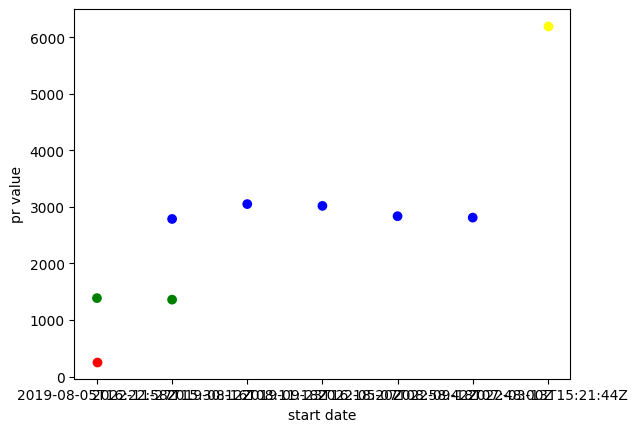

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

distances = [
    # '400m',
    # # '1/2 mile', TODO empty
    '1k',
    # '1 mile',
    # '2 mile',
    '5k',
    '10k',
    # '15k',
    # '10 mile',
    '20k',
    # 'Half-Marathon'
]

# # FIXME : when i add a second distance, i lost date sort
# distances = [
#     '5k',
#     '10k',
# ]

colors = {
    '1k':'red',
    '5k':'green',
    '10k':'blue',
    '20k':'yellow'
}

fig, ax = plt.subplots()

for distance in distances :
    efforts = achievements.get(distance)
    df = pd.DataFrame(efforts).reset_index().sort_values('start_date')
    ax.scatter(df['start_date'], df['pr_value'], c=df['pr_key'].map(colors))

ax.set_xlabel("start date")
ax.set_ylabel("pr value")
plt.show()
